In [12]:

# ------- SERVER EXTENSIONS ---------
lib =  r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities/droplet_dataset'
lib2 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities'
lib3 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/data_analysis'
lib4 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy'
lib5 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/scripts'
import sys
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
from utilities.general_helpers import *
# ------- SERVER EXTENSIONS ---------

import sys
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.manifold import TSNE
import pickle
# from Bio.Cluster import kcluster
import os
import numpy as np
import yaml
import os
import pandas
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import seaborn as sns
# import statsmodels as sm
import scipy.stats as stats
from scipy.stats import rankdata
from Bio.Cluster import kcluster
from sklearn.manifold import TSNE
import pickle
import numpy as np
from utilities.general_helpers import flatten_list

# import pyclustering
from shutil import copyfile
from os.path import join

['M100.pkl',
 'M101.pkl',
 'M102.pkl',
 'M103.pkl',
 'M104.pkl',
 'M105.pkl',
 'M106.pkl',
 'M107.pkl',
 'M108.pkl',
 'M109.pkl',
 'M110.pkl',
 'M111.pkl',
 'M112.pkl',
 'M114.pkl',
 'M115.pkl',
 'M116.pkl',
 'M118.pkl',
 'M120.pkl',
 'M121.pkl',
 'M122.pkl',
 'M123.pkl',
 'M124.pkl',
 'M125.pkl',
 'M126.pkl',
 'M127.pkl',
 'M128.pkl',
 'M129.pkl',
 'M130.pkl',
 'M131.pkl',
 'M132.pkl',
 'M133.pkl',
 'M134.pkl',
 'M135.pkl',
 'M136.pkl',
 'M137.pkl',
 'M138.pkl',
 'M139.pkl',
 'M140.pkl',
 'M141.pkl',
 'M143.pkl',
 'M144.pkl',
 'M97.pkl',
 'M98.pkl',
 'M99.pkl']

In [77]:

# Build cohort gene list
samples_information_path = r'/storage/md_keren/shitay/Data/inferCNV_data/update_runs/4.3.21'
samples = sorted([subfolder for subfolder in os.listdir(samples_information_path) if not 'csv' in subfolder])

gene_ids = []
# loop over all samples and add each of them into the cohort.
for sample_id in samples[:41] + samples[43:]:
    # retrieve sample from PC
    sample_information = pickle.load(open(join(samples_information_path, sample_id), 'rb'))
    features = sample_information[2]
    print(f'sample {sample_id}, num of genes {len(features)}')
    gene_names = sample_information[3]
    gene_ids += list(zip(features, gene_names))

processed_gene_ids = sorted(list(set(gene_ids)), key=lambda x: x[0])

sample M100.pkl, num of genes 20765
sample M101.pkl, num of genes 22423
sample M102.pkl, num of genes 21324
sample M103.pkl, num of genes 20400
sample M104.pkl, num of genes 23198
sample M105.pkl, num of genes 22537
sample M106.pkl, num of genes 22752
sample M107.pkl, num of genes 22683
sample M108.pkl, num of genes 20906
sample M109.pkl, num of genes 21987
sample M110.pkl, num of genes 22327
sample M111.pkl, num of genes 22219
sample M112.pkl, num of genes 21540
sample M114.pkl, num of genes 24214
sample M115.pkl, num of genes 21681
sample M116.pkl, num of genes 19183
sample M118.pkl, num of genes 20194
sample M120.pkl, num of genes 21080
sample M121.pkl, num of genes 22987
sample M122.pkl, num of genes 19626
sample M123.pkl, num of genes 23673
sample M124.pkl, num of genes 20889
sample M125.pkl, num of genes 14842
sample M126.pkl, num of genes 19571
sample M127.pkl, num of genes 19989
sample M128.pkl, num of genes 19760
sample M129.pkl, num of genes 22310
sample M130.pkl, num of gene

In [78]:
len(list(dict(Counter(gene_ids)).items()))

30521

[(1, 1204),
 (2, 826),
 (3, 724),
 (4, 607),
 (5, 528),
 (6, 484),
 (7, 398),
 (8, 364),
 (9, 379),
 (10, 383),
 (11, 321),
 (12, 320),
 (13, 279),
 (14, 325),
 (15, 258),
 (16, 289),
 (17, 269),
 (18, 254),
 (19, 291),
 (20, 241),
 (21, 256),
 (22, 250),
 (23, 263),
 (24, 249),
 (25, 263),
 (26, 252),
 (27, 256),
 (28, 260),
 (29, 284),
 (30, 267),
 (31, 272),
 (32, 270),
 (33, 313),
 (34, 284),
 (35, 337),
 (36, 348),
 (37, 363),
 (38, 418),
 (39, 439),
 (40, 533),
 (41, 634),
 (42, 856),
 (43, 1838),
 (44, 12272)]

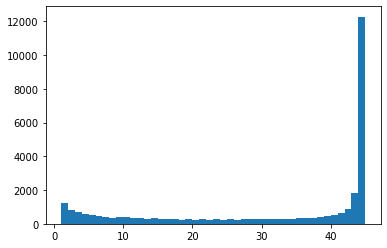

In [93]:
app = [ii[1] for ii in list(dict(Counter(gene_ids)).items())]
plt.hist(app, bins=np.arange(1, 46));
# plt.hist(app);
sorted(dict(Counter(app)).items())
# sum(list(dict(Counter(app)).values()))

In [80]:
FILTERED_CELLS_PATH = fr'/storage/md_keren/shitay/outputs/variance_filtered/immune_cells_var0.315.pkl'
immune_cohort = pickle.load(open(FILTERED_CELLS_PATH, 'rb'))

In [81]:
immune_cohort.features

['ENSG00000000938',
 'ENSG00000001631',
 'ENSG00000002330',
 'ENSG00000002549',
 'ENSG00000002586',
 'ENSG00000002822',
 'ENSG00000002834',
 'ENSG00000002933',
 'ENSG00000003056',
 'ENSG00000003402',
 'ENSG00000003756',
 'ENSG00000004059',
 'ENSG00000004142',
 'ENSG00000004455',
 'ENSG00000004468',
 'ENSG00000004478',
 'ENSG00000004534',
 'ENSG00000004700',
 'ENSG00000004779',
 'ENSG00000005020',
 'ENSG00000005022',
 'ENSG00000005059',
 'ENSG00000005075',
 'ENSG00000005302',
 'ENSG00000005339',
 'ENSG00000005448',
 'ENSG00000005483',
 'ENSG00000005486',
 'ENSG00000005700',
 'ENSG00000005810',
 'ENSG00000005844',
 'ENSG00000005893',
 'ENSG00000005955',
 'ENSG00000006015',
 'ENSG00000006075',
 'ENSG00000006114',
 'ENSG00000006125',
 'ENSG00000006451',
 'ENSG00000006576',
 'ENSG00000006625',
 'ENSG00000006634',
 'ENSG00000006652',
 'ENSG00000006712',
 'ENSG00000007080',
 'ENSG00000007168',
 'ENSG00000007255',
 'ENSG00000007264',
 'ENSG00000007312',
 'ENSG00000007392',
 'ENSG00000007944',


In [82]:
mapping = [(ii[0][0], ii[1]) for ii in list(dict(Counter(gene_ids)).items())]
res = [mm for mm in mapping if mm[0] in immune_cohort.features]

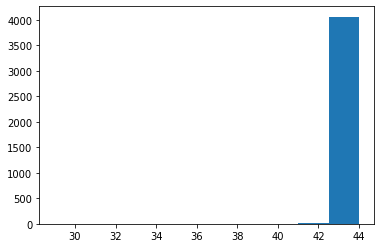

In [83]:
plt.hist([rr[1] for rr in res]);

In [84]:
res
df = pd.read_excel(r'/storage/md_keren/shitay/Data/tables/gene_ens_map.xlsx')

In [85]:
maps = {aa[0][:-2]: aa[2] for aa in df.values.tolist()}
# [maps[rr[0]] for rr in res]
maps
print('  '+res[0][0])
genes = [rr[0] for rr in res]
overlap = [gg for gg in genes if gg in list(maps.keys())]


  ENSG00000188976


In [86]:
len(overlap)

2543

In [87]:
Counter([maps[gg] for gg in overlap])

Counter({'protein_coding': 2473, 'antisense': 28, 'lincRNA': 42})